In [1]:
import pandas as pd
import os

In [2]:
june = pd.read_csv('C:/Users/Shlagha Rastogi/Downloads/Semester 3/SWTA/June_2018.csv', encoding="ISO-8859-1")
may = pd.read_csv('C:/Users/Shlagha Rastogi/Downloads/Semester 3/SWTA/May_2018.csv', encoding="ISO-8859-1")
feb = pd.read_csv('C:/Users/Shlagha Rastogi/Downloads/Semester 3/SWTA/Feb_2018.csv', encoding="ISO-8859-1")

In [3]:
print(june.shape)
june.head()

(84536, 39)


,messageID,Message Source,Profile Pic,Profile Link,From,Bio,Title,Message,Post Image,Post Name,...,To Email,To Team,From Basket,To Basket,Rule Name,Priority,Action,Ticket ID,Review,Sub Query
0,fbc_1_201477243197783_2149770155035139_2151247...,Facebook Comment,https://graph.facebook.com/2118980871690266/pi...,http://facebook.com/2118980871690266,Manvi Raina,,,Price plz,,,...,,,,ORM Team,Auto Assignment,TRIVIAL,Assigned,222421884114149220,NaN,NaN
1,fbc_1_201477243197783_2150605241618297_2151250...,Facebook Comment,https://graph.facebook.com/367228417124693/pic...,http://facebook.com/367228417124693,Vandana Duakataria,,,Pp,,,...,,,,ORM Team,Auto Assignment,TRIVIAL,Assigned,222421884114142230,NaN,NaN
2,fbc_1_201477243197783_2148373755174779_2151252...,Facebook Comment,https://graph.facebook.com/258223454746720/pic...,http://facebook.com/258223454746720,Rajeev Rajeev,,,Nice,,,...,,,,ORM Team,Auto Assignment,TRIVIAL,Assigned,222421884114151718,NaN,NaN
3,fbc_1_201477243197783_2149735608371927_2151259...,Facebook Comment,https://graph.facebook.com/2128204954122811/pi...,http://facebook.com/2128204954122811,Pooja Narula,,,Pp,,,...,,,,ORM Team,Auto Assignment,TRIVIAL,Assigned,222421884114153208,NaN,NaN
4,fbc_1_201477243197783_2149754831703338_2151260...,Facebook Comment,https://graph.facebook.com/355753841609985/pic...,http://facebook.com/355753841609985,Richa Mishra,,,Pp,,,...,,,,ORM Team,Auto Assignment,TRIVIAL,Assigned,222421884114153240,NaN,NaN


In [4]:
june.columns

Index(['messageID', 'Message Source', 'Profile Pic', 'Profile Link', 'From',
       'Bio', 'Title', 'Message', 'Post Image', 'Post Name', 'Average Rating',
       'No. of Raters', 'Total views', 'Post Caption', 'Country', 'State',
       'City', 'Sentiment', 'Gender', 'Listed', 'Comment Count', 'Link',
       'Source', 'Collected On', 'Topics', 'From Name', 'From Email',
       'From Team', 'To Name', 'To Email', 'To Team', 'From Basket',
       'To Basket', 'Rule Name', 'Priority', 'Action', 'Ticket ID', 'Review',
       'Sub Query'],
      dtype='object')

In [5]:
# def dedups(df):
#     df = df[["Collected On","Message", "Gender"]].drop_duplicates(subset = 'Message')
#     df = df.dropna()
#     df.reset_index(inplace=True, drop=True)
#     return df

# june1 = dedups(june)
# feb1 = dedups(feb)
# may1 = dedups(may)

In [6]:
# june1.head()

In [7]:
# def lablencod(df):
#     from sklearn.preprocessing import LabelEncoder
#     le = LabelEncoder()
#     df["Gender"] = le.fit_transform(df["Gender"])
#     df["Message"] = df["Message"].str.lower()
#     return df

# june2 = lablencod(june1)
# # lablencod(feb1)
# # lablencod(may1)

In [8]:
# june2.head()

In [9]:
# def stemming(df):
#     from nltk.tokenize import word_tokenize
#     from nltk.corpus import stopwords
#     from string import punctuation

#     from nltk.stem import LancasterStemmer
#     ls = LancasterStemmer()

#     stopwords2beremoved = list(stopwords.words(["english"])) + list(punctuation)

#     df_final = []
#     data_list = df["Message"].tolist()
#     for i in range(len(data_list)):
#         token_key = word_tokenize(data_list[i])
#         clean_key = [x for x in token_key if x not in stopwords2beremoved]
#         stem_key = [ls.stem(x) for x in clean_key]
#         bind_key = " ".join(stem_key)
#         df_final.append(bind_key)
#     return df_final

# june3 = stemming(june2)

In [10]:
# june3

In [5]:
def dedups(df):
    df = df[["Message", "Sentiment"]].drop_duplicates(subset = 'Message')
    df = df.dropna()
    df.reset_index(inplace=True, drop=True)
    return df

def lablencod(df):
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    
    df["Sentiment"] = le.fit_transform(df["Sentiment"])
    
    df["Message"] = df["Message"].str.lower()
    return df
    
def stemming(df):
    from nltk.tokenize import word_tokenize
    from nltk.corpus import stopwords
    from string import punctuation

    from nltk.stem import LancasterStemmer
    ls = LancasterStemmer()

    stopwords2beremoved = list(stopwords.words(["english"])) + list(punctuation)

    df_final = []
    data_list = df["Message"].tolist()
    for i in range(len(data_list)):
        token_key = word_tokenize(data_list[i])
        clean_key = [x for x in token_key if x not in stopwords2beremoved]
        stem_key = [ls.stem(x) for x in clean_key]
        bind_key = " ".join(stem_key)
        df_final.append(bind_key)
    return df_final

#main function
def df(df):
    cleaned_df = dedups(df)
    cleaned_df1 = lablencod(cleaned_df)
    cleaned_df2 = stemming(cleaned_df1)
    
    df_final = pd.DataFrame(cleaned_df2)
    df_final["Sentiment"] = cleaned_df1["Sentiment"]
    df_final.columns = ["Message", "Sentiment"]
    return df_final

def tf(df):    
    from sklearn.feature_extraction.text import TfidfVectorizer
    tfidf = TfidfVectorizer()
    vector = tfidf.fit_transform(df["Message"])
    return vector.toarray()
    

In [12]:
# cleaned_june = dedups(june)
# print(cleaned_june.shape)

# cleaned_june1 = lablencod(cleaned_june)
# print(cleaned_june1.shape)

# cleaned_june2 = stemming(cleaned_june1)

# df1 = pd.DataFrame(cleaned_june2)
# df1["date"] = cleaned_june1["Collected On"]
# df1.columns = ["date", "sentiment"]
# df1.head()

In [13]:
# cleaned_june1.head()

In [14]:
# cleaned_feb = dedups(feb)
# print(cleaned_feb.shape)

# cleaned_feb1 = lablencod(cleaned_feb)
# print(cleaned_feb1.shape)

# cleaned_feb2 = stemming(cleaned_feb1)

# feb_final = pd.DataFrame(cleaned_feb2)
# feb_final["sentiment"]=cleaned_feb1["Sentiment"]
# feb_final.columns = ["message","sentiment"]
# feb_final.head()

In [15]:
# cleaned_may = dedups(may)
# cleaned_may1 = lablencod(cleaned_may)
# cleaned_may2 = stemming(cleaned_may1)
# print(cleaned_may1.shape)
# may_final = pd.DataFrame(cleaned_may2)
# may_final["sentiment"]=cleaned_may1["Sentiment"]
# may_final.columns = ["message","sentiment"]
# may_final.head()

In [6]:
j = df(june)
print(j.shape)

f = df(feb)
print(f.shape)

m = df(may)
print(m.shape)

(9824, 2)
(6135, 2)
(15400, 2)


In [7]:
df = j.append([f,m], ignore_index = True)
df.shape

(31359, 2)

In [8]:
df.head()

,Message,Sentiment
0,pric plz,1
1,pp,1
2,nic,2
3,pp,1
4,mast,2


In [21]:
# def tf(df):    
#     from sklearn.feature_extraction.text import TfidfVectorizer
#     tfidf = TfidfVectorizer()
#     vector = tfidf.fit_transform(df["message"])
#     return vector.toarray()

In [9]:
X = tf(df)
X.shape

(31359, 26063)

In [10]:
X_train = X[:15959, :]
X_test = X[15959:, :]

In [11]:
y = pd.Series(df["Sentiment"])
y.shape

(31359,)

In [12]:
y_train = y[:15959]
y_test = y[15959:]

In [13]:
X_train.shape # Vectorised reviews for Feb and June

(15959, 26063)

In [14]:
y_train.shape # LabelEncoded sentiments for Feb and June

(15959,)

In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [16]:
mnb = MultinomialNB()

mnb_fit = mnb.fit(X_train, y_train)
mnb_pred = mnb.predict(X_test)

print(classification_report(y_test,mnb_pred))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00       791
           1       0.82      0.97      0.89     11783
           2       0.77      0.41      0.54      2826

    accuracy                           0.82     15400
   macro avg       0.87      0.46      0.48     15400
weighted avg       0.82      0.82      0.78     15400



In [17]:
rfc = RandomForestClassifier()

rfc_fit = rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

print(classification_report(y_test, rfc_pred))

C:\Users\Shlagha Rastogi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.69      0.42      0.52       791
           1       0.92      0.94      0.93     11783
           2       0.78      0.80      0.79      2826

    accuracy                           0.89     15400
   macro avg       0.80      0.72      0.75     15400
weighted avg       0.88      0.89      0.88     15400



In [31]:
y.value_counts()

1    23272
2     6318
0     1769
Name: Sentiment, dtype: int64

In [32]:
may.columns

Index(['messageID', 'Message Source', 'Profile Pic', 'Profile Link', 'From',
       'Bio', 'Title', 'Message', 'Post Image', 'Post Name', 'Average Rating',
       'No. of Raters', 'Total views', 'Post Caption', 'Post Description',
       'Country', 'State', 'City', 'Sentiment', 'Gender', 'Following',
       'Followers', 'Favourites', 'Listed', 'Status Count', 'Comment Count',
       'Tags', 'Link', 'Source', 'Created On (Posted On)', 'Collected On',
       'Timestamp', 'Topics', 'From Name', 'From Email', 'From Team',
       'To Name', 'To Email', 'To Team', 'From Basket', 'To Basket',
       'Rule Name', 'Priority', 'Action', 'Work Message', 'Response Message',
       'Assigned To Agent', 'Assigned To Workbasket', 'Action Start Date',
       'Action Date', 'Ticket ID', 'Notes', 'Served On', 'Date', 'Time',
       'Topics.1', 'Review', 'Sub Query', 'Message Ageing', 'Case Ageing',
       'Action Start Iteration', 'Action Start Total',
       'Action Start WH Iteration', 'Action Start W

In [172]:
maydf = may[['Message', 'Sentiment', 'Date']]
maydf.head()

,Message,Sentiment,Date
0,AGar mangaya hua sman tuta ya kharab nikla to ...,Neutral,21-05-2018
1,AGar mangaya hua sman tuta ya kharab nikla to ...,Neutral,21-05-2018
2,AGar mangaya hua sman tuta ya kharab nikla to ...,Neutral,21-05-2018
3,AGar mangaya hua sman tuta ya kharab nikla to ...,Neutral,21-05-2018
4,Pp,Neutral,28-05-2018


In [173]:
maydf["Sentiment"].value_counts()

Neutral     78560
Positive    21692
Negative     2906
Name: Sentiment, dtype: int64

In [174]:
# Initial cleaning of the dataset. Removing dups based on message column and removing any null rows
def dedups(df):
    df = df[["Message", "Sentiment", "Date"]].drop_duplicates(subset = 'Message')
    df = df.dropna()
    df.reset_index(inplace=True, drop=True)
    return df

# Deduplicating the actual dataframe
dedup_may = dedups(maydf)
dedup_may.head()

,Message,Sentiment,Date
0,AGar mangaya hua sman tuta ya kharab nikla to ...,Neutral,21-05-2018
1,Pp,Neutral,28-05-2018
2,I am sorry to inform you that after 9days you ...,Negative,14-05-2018
3,Today is Thursday again how. Many days you want,Neutral,17-05-2018
4,???? ??? ???? ??? ? ??? ?? 104710797 ???? ??? ...,Neutral,14-05-2018


In [175]:


# Converting message column to lower
dedup_may["Message"] = dedup_may["Message"].str.lower()

# Function to stem the message column of the dataset
def stemming(df):
    from nltk.tokenize import word_tokenize
    from nltk.corpus import stopwords
    from string import punctuation

    from nltk.stem import LancasterStemmer
    ls = LancasterStemmer()

    stopwords2beremoved = list(stopwords.words(["english"])) + list(punctuation)

    df_final = []
    data_list = df["Message"].tolist()
    for i in range(len(data_list)):
        token_key = word_tokenize(data_list[i])
        clean_key = [x for x in token_key if x not in stopwords2beremoved]
        stem_key = [ls.stem(x) for x in clean_key]
        bind_key = " ".join(stem_key)
        df_final.append(bind_key)
    return df_final

# Stemming the message column
stemmed_may = stemming(dedup_may)

# Combining the stemmed message, label encoded sentiments and date columns to a dataframe
may_final = pd.DataFrame(stemmed_may)
may_final["Sentiment"] = dedup_may["Sentiment"]
may_final["Date"] = dedup_may["Date"]
may_final.columns = ["Message", "Sentiment", "Date"]
may_final.head()

,Message,Sentiment,Date
0,ag mangay hua sman tut ya kharab nikl kya hog,Neutral,21-05-2018
1,pp,Neutral,28-05-2018
2,sorry inform 9days n't giv produc within 24 hr...,Negative,14-05-2018
3,today thursday many day want,Neutral,17-05-2018
4,104710797,Neutral,14-05-2018


In [176]:
may_final = may_final[may_final.Date != '###############################################################################################################################################################################################################################################################']
may_final.Date.value_counts().head()

17-05-2018    695
18-05-2018    649
03-05-2018    642
14-05-2018    620
04-05-2018    561
Name: Date, dtype: int64

In [177]:
may_final.shape

(15390, 3)

In [178]:
# Further cleaning the messages with no numbers and 
from nltk.tokenize import word_tokenize
def my_tokenizer(s):
    final_corpus= []
    for i in range(len(s)):
        text = word_tokenize(s[i])
        text1 = [t for t in text if len(t)>2]
        text2 = [t for t in text1 if not any(c.isdigit() for c in t)]
        sent = " ".join(text2)
        final_corpus.append(sent)
    return final_corpus

test_may = my_tokenizer(may_final["Message"].tolist())

In [179]:
test_may

['mangay hua sman tut kharab nikl kya hog',
 '',
 "sorry inform n't giv produc within hrs n't receiv produc msg soc med",
 'today thursday many day want',
 '',
 'got it.but cent ring accord pict pink colo stone.but ring whit colo ston',
 'reply',
 '',
 'already pay yet return',
 'craftsvill await fornyo reply respons',
 '',
 'beauty',
 'hii',
 'beauty necklac',
 'niccc',
 'pric',
 'awsom necklac',
 '',
 'nic',
 'pric',
 'lov post men',
 '',
 '',
 'colo send',
 'exchang kurt smal siz',
 'pric',
 'hii',
 'har kint cha',
 '',
 'beutiful',
 'nic',
 'santh sunny',
 'good',
 'pric jyad ism gold kitan',
 'nic',
 'pric pleas',
 '',
 'dam bek frot',
 'nic dress',
 'nic piec',
 'good collect',
 'thank',
 '',
 'tim favourit',
 'awesom',
 'pric',
 'simpl neat',
 'wow sup',
 'hii',
 'nic sar',
 '',
 'oosam',
 'dil khush',
 'cal pleas',
 'ayushm bhut',
 'want much',
 'beauty dre',
 'beauty collect',
 'ord',
 '',
 'many cost',
 'osm',
 'jay shree laxm naray',
 'jay shree ganeshay namah',
 'hey crafts

In [180]:
# Converting the stemmed and clean messages to a dataframe
test_may = pd.DataFrame(test_may)
test_may["Date"] = may_final["Date"]
test_may["Sentiment"] = may_final["Sentiment"]
test_may.columns = ["Message", "Date", "Sentiment"]
test_may.head()

,Message,Date,Sentiment
0,mangay hua sman tut kharab nikl kya hog,21-05-2018,Neutral
1,,28-05-2018,Neutral
2,sorry inform n't giv produc within hrs n't rec...,14-05-2018,Negative
3,today thursday many day want,17-05-2018,Neutral
4,,14-05-2018,Neutral


In [181]:
# Sorting date wise
test_may.sort_values(by=["Date"], inplace=True, ascending=True)
test_may

,Message,Date,Sentiment
9079,get it.. pay mod,01-05-2018,Neutral
9355,sup dup jod,01-05-2018,Neutral
9354,cur monday blu craftsvill https,01-05-2018,Neutral
9353,nic supr ieruku,01-05-2018,Neutral
9352,che numb cal,01-05-2018,Neutral
9351,,01-05-2018,Neutral
9350,sangeeth turn sal ambassad congr bless,01-05-2018,Neutral
9349,,01-05-2018,Neutral
9348,sud jayap,01-05-2018,Neutral
9347,blu red sar beauty,01-05-2018,Neutral


In [183]:
import numpy as np
test_may["Message"].replace('', np.nan, inplace=True)
test_may = test_may.dropna()
test_may.reset_index(inplace=True, drop=True)
test_may

,Message,Date,Sentiment
0,get it.. pay mod,01-05-2018,Neutral
1,sup dup jod,01-05-2018,Neutral
2,cur monday blu craftsvill https,01-05-2018,Neutral
3,nic supr ieruku,01-05-2018,Neutral
4,che numb cal,01-05-2018,Neutral
5,sangeeth turn sal ambassad congr bless,01-05-2018,Neutral
6,sud jayap,01-05-2018,Neutral
7,blu red sar beauty,01-05-2018,Neutral
8,heart shap mangalsutr pic pric btan,01-05-2018,Neutral
9,kiman.dam.kowa.atia.kinim,01-05-2018,Neutral


In [184]:
test_may["Sentiment"].value_counts()

Neutral     10908
Positive     2641
Negative      734
Name: Sentiment, dtype: int64

In [197]:
neutral_messages = test_may.loc[test_may["Sentiment"]=="Neutral"]
positive_messages = test_may.loc[test_may["Sentiment"]=="Positive"]
negative_messages = test_may.loc[test_may["Sentiment"]=="Negative"]

neutral_msgs = neutral_messages["Message"].tolist()
positive_msgs = positive_messages["Message"].tolist()
negative_msgs = negative_messages["Message"].tolist()

from nltk import *
def most_common_words(df):
    sentlist = []
    for i in range(len(df)):
        word = word_tokenize(df[i])
        sent = " ".join(word)
        sentlist.append(sent)

    fdist = FreqDist(sentlist)
    return (fdist.most_common(10))

neutral_words = []
positive_words = []
negative_words = []

for i in range(10):
    neutral_words.append(most_common_words(neutral_msgs)[i][0])
    positive_words.append(most_common_words(positive_msgs)[i][0])
    negative_words.append(most_common_words(negative_msgs)[i][0])

In [187]:
neutral_words

['nic',
 'pric',
 'beauty',
 'ord',
 'craftsvill',
 'much',
 'https',
 'cost',
 'lik',
 'nic sar']

In [188]:
positive_words

['nic',
 'beauty',
 'nic sar',
 'pric',
 'beauty sar',
 'good',
 'wow',
 'ord',
 'sup',
 'lov']

In [189]:
negative_words

['nic',
 'sup',
 'ord',
 'good',
 'https',
 'pric',
 'beauty',
 'lov shar',
 'pls',
 'verry nic']

In [192]:
test_may["Date"] = pd.to_datetime(test_may["Date"])

C:\Users\Shlagha Rastogi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [193]:
len(test_may["Date"])

14283

KeyboardInterrupt: 

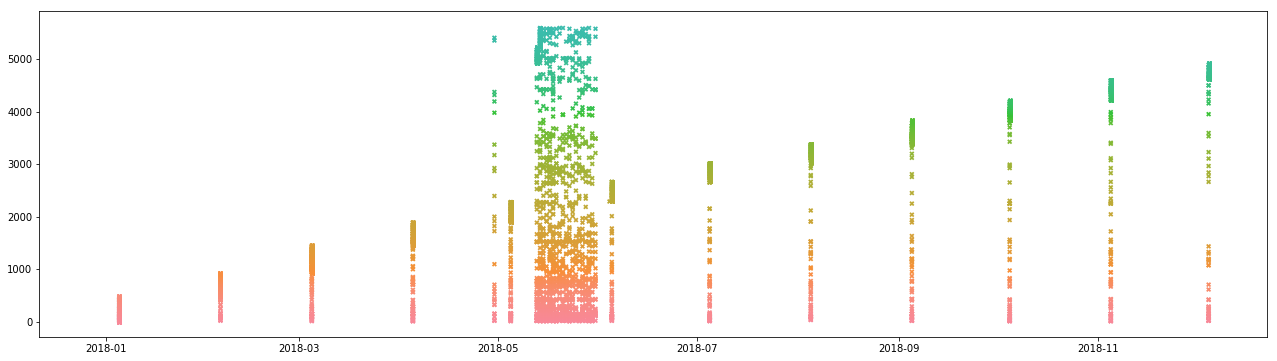

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(22,6))
disp_plot = sns.stripplot(x="Date",y="Message", data=test_may, orient='h',size=5, marker="X")
plt.xticks(rotation=15)

plt.xlabel("Dates")
plt.ylabel("Words")
plt.title("Dispersion Plot")

plt.tight_layout()
plt.show()

In [191]:
import matplotlib.pyplot as plt
import re
text = test_may["Message"]
words = re.split("\W", text) # split into words
WORD = neutral_words # define word to search for

x=list()
for i in range(0,len(words)): # for every word in text
    if words[i] == WORD: # check if word is word we are searching for
        x.append(i) # if so, append its position to variable x

fig, ax = plt.subplots()
ax.vlines(x, 0, 1, edgecolor="red") # <-- ANSWER
ax.set_xlim([0, len(words)]) # set the lower and upper limits of graph
ax.set_xlabel('narrative time')
ax.set_xticks([0],minor=True) # turn off: ax.set_xticks([])
ax.set_ylabel(WORD) # turn off by droping this line
ax.set_yticks([])
fig.set_figheight(1) # figure height, see also fig.set_figwidth()

TypeError: expected string or bytes-like object